In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import statistics as st
%matplotlib inline

In [3]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

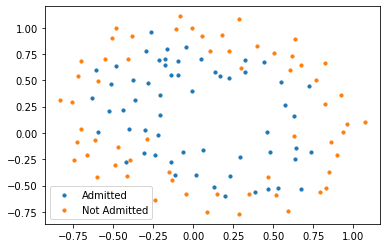

In [4]:
# data = np.loadtxt('ex2data1.txt',delimiter=',')
data = load_data("ex2data2.txt", None)
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [5]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))      
    return out

x1=np.array(data.iloc[:,0])
x2=np.array(data.iloc[:,1])
X_Feature = mapFeature(x1,x2)
print(X_Feature)

print(X_Feature.shape)

[[ 1.00000000e+00  5.12670000e-02  6.99550000e-01 ...  6.29434948e-04
   8.58878456e-03  1.17195940e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]
(118, 28)


In [6]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [7]:
def net_input(theta,x):
    return np.dot(x,theta)

In [8]:
def probability(theta,x):
    return sigmoid(net_input(theta,x))

In [9]:
def cost_function(x,y,theta,lemda):

    m=x.shape[0]
    a1=probability(theta, x)
    a2=1 - probability(theta, x)
    if a1.all() and a2.all():
        cost = -(1 / m) * np.sum(y*np.log(a1) + (1 - y)*np.log(a2)) + (lemda * np.sum(np.square(theta)))
    else:
        cost=0
    return cost

In [10]:
def logical_regression_gradient_descent(x,y,theta,learning_rate,iter,lembda):
    n=(x.shape[0])
    y=pd.DataFrame(data[2])
    cost_value = np.zeros(iter)
    theta_value = np.zeros((iter,28))
    for i in range(iter):
        h_x = probability(theta,x)
        theta = theta - (1/n)*learning_rate*np.dot(np.transpose(x),(h_x-y))
        theta_value[i] = np.transpose(theta)
        cost_value[i] = cost_function(x,y,theta,lembda)        
    return theta,cost_value,theta_value  

In [11]:
theta = np.random.randn(28,1)
# x = np.c_[np.ones((len(X_Feature),1)),X_Feature]

x=X_Feature

learning_rate=0.01
iter=10000
lembda=0.5
# print(theta)
theta,cost_value,theta_value = logical_regression_gradient_descent(x,y,theta,learning_rate,iter,lembda)
print('Theta 0 = ',theta[0][0])
print('Theta 1 = ',theta[1][0])
print('Theta 2 = ',theta[2][0])
print('Final cost = ',cost_value[-1])


Theta 0 =  1.4988882685781244
Theta 1 =  0.26395073593754914
Theta 2 =  1.5996507422760213
Final cost =  23.171366084684628


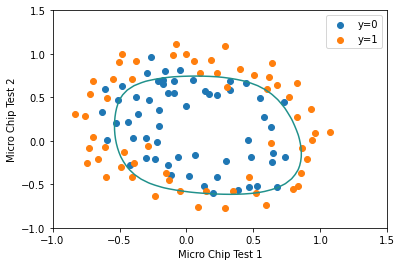

In [12]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
        
mask = y.values.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Micro Chip Test 1')
plt.ylabel('Micro Chip Test 2')
plt.legend((passed, failed), ('y=0', 'y=1'))
plt.show()
